In [1]:
#https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?resource=download

# Import bibliotecas

In [463]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Sampling
from imblearn.under_sampling import NearMiss

# 1 Leitura dos dados

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

## 1.1 Variáveis

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2 corresponds to there being no credit to pay; -1=pay duly, 0= payment being made on time but not the total amount to clear the balance, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

# 2 Limpeza

## 2.1 Valores faltantes

In [4]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

- Não há valores faltantes na base de dados

## 2.2 Tuplas duplicadas

In [12]:
## Checando pela chave primária
df.ID.duplicated().sum()

0

- Não há valores duplicados na base

## Exclusão colunas não necessárias

In [14]:
df = df.drop(columns=["ID"])

## 3 Analise exploratória dos dados (E.D.A)

## 3.1 Estatística descritiva

In [15]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

- Cerca de 22.12% da base de dados é composta por clientes não pagantes

## 3.2 Tipo de variáveis

In [30]:
for feature in df.columns:
    print(" Valores unicos para a variável = {} - {}".format(feature,len(df[feature].unique())))

 Valores unicos para a variável = LIMIT_BAL - 81
 Valores unicos para a variável = SEX - 2
 Valores unicos para a variável = EDUCATION - 7
 Valores unicos para a variável = MARRIAGE - 4
 Valores unicos para a variável = AGE - 56
 Valores unicos para a variável = PAY_0 - 11
 Valores unicos para a variável = PAY_2 - 11
 Valores unicos para a variável = PAY_3 - 11
 Valores unicos para a variável = PAY_4 - 11
 Valores unicos para a variável = PAY_5 - 10
 Valores unicos para a variável = PAY_6 - 10
 Valores unicos para a variável = BILL_AMT1 - 22723
 Valores unicos para a variável = BILL_AMT2 - 22346
 Valores unicos para a variável = BILL_AMT3 - 22026
 Valores unicos para a variável = BILL_AMT4 - 21548
 Valores unicos para a variável = BILL_AMT5 - 21010
 Valores unicos para a variável = BILL_AMT6 - 20604
 Valores unicos para a variável = PAY_AMT1 - 7943
 Valores unicos para a variável = PAY_AMT2 - 7899
 Valores unicos para a variável = PAY_AMT3 - 7518
 Valores unicos para a variável = PAY_A

### 3.2.1 Definição de features categóricas, contínuas e target

In [95]:
features_continuas = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
features_categoricas = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
var_target = 'default.payment.next.month'

## 3.2 Distribuição variáveis contínuas

In [98]:
df_continua = df[ features_continuas + [var_target] ]

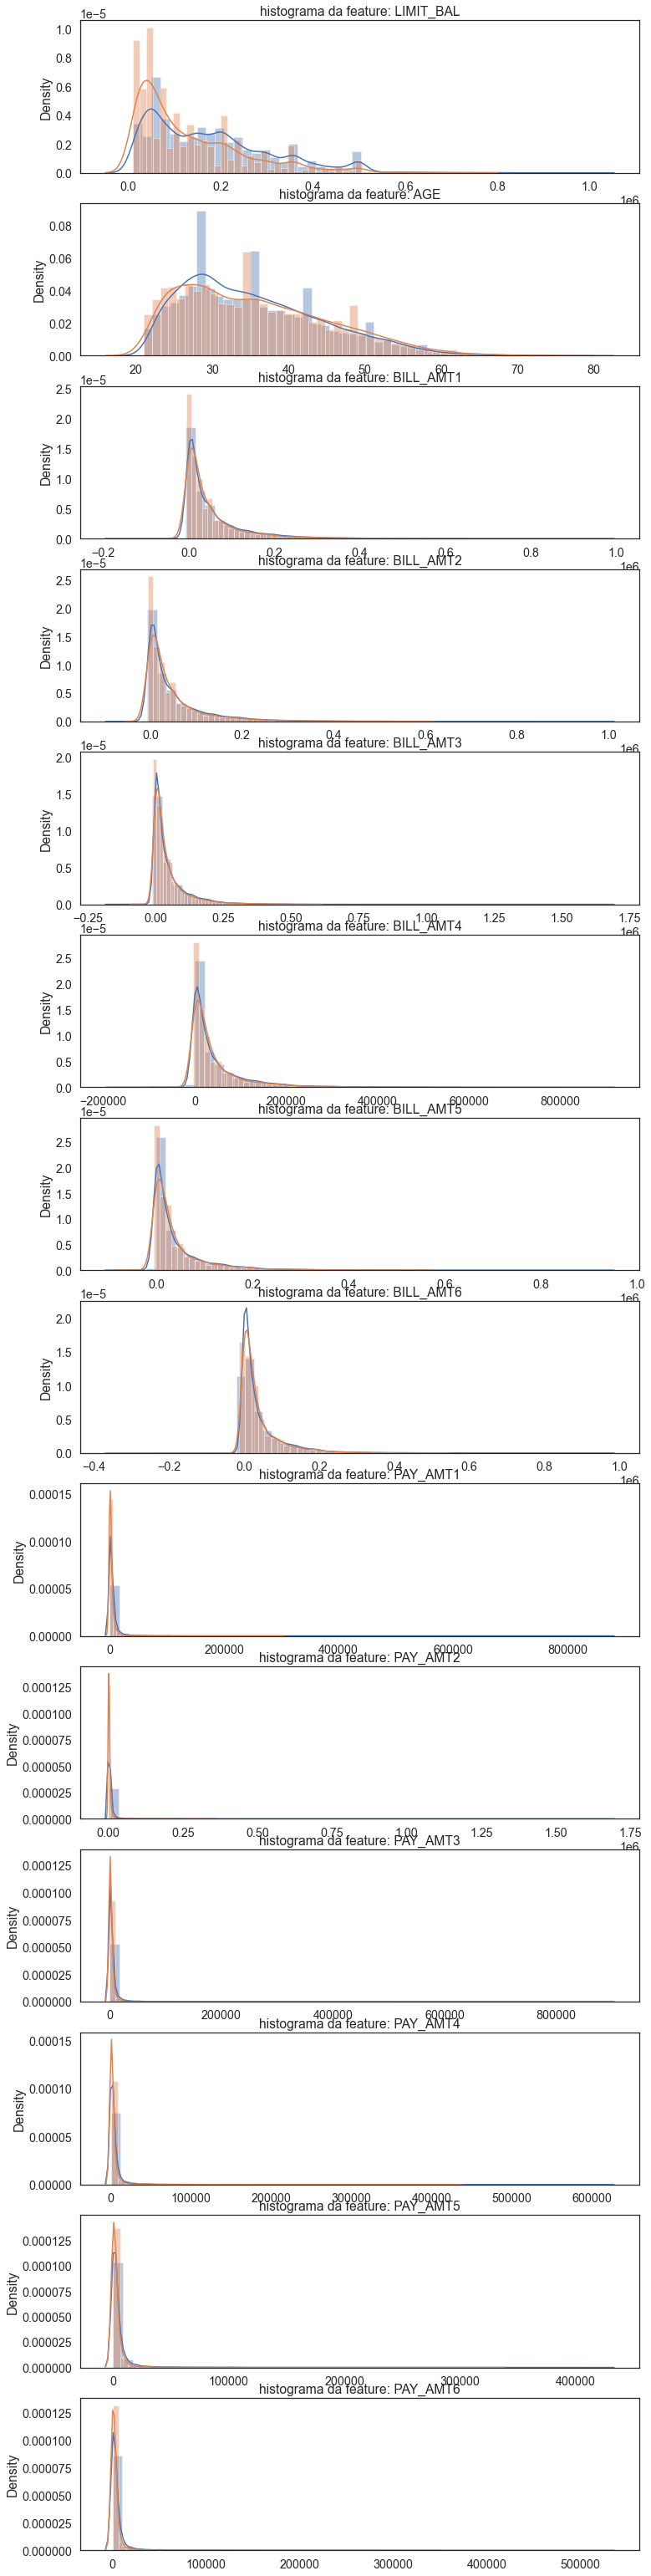

In [100]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

features = features_continuas

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df_continua[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_continua[cn][df_continua[var_target] == 0], bins=50)
    sns.distplot(df_continua[cn][df_continua[var_target] == 1], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma da feature: ' + str(cn))
plt.show()

- Há maior concentração de mau pagadores com LIMIT_BAL menores em comparação a bons pagadores
- Há maior concentração de mau pagadores com BLL_AMT1 menores em comparação a bons pagadores
- A distribuição das outras variáveis são semelhantes entre bons e maus pagadores

## 3.3 Distribuição variáveis categóricas

In [102]:
df_categorica = df[features_categoricas + [var_target]]

### Distribuição de mau pagadores

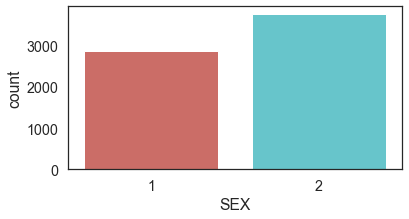

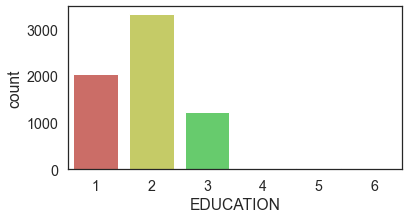

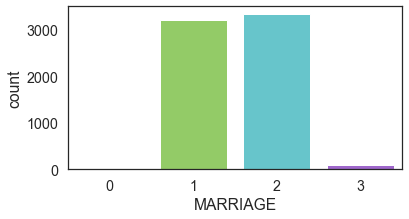

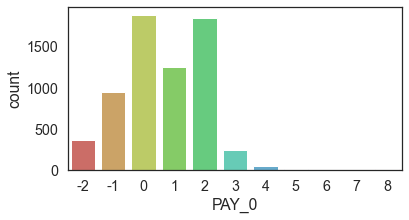

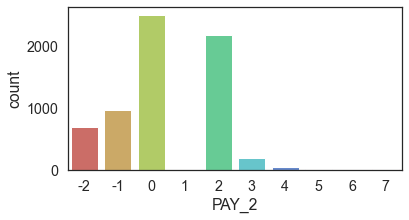

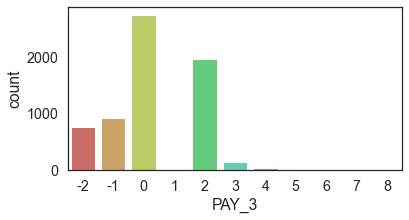

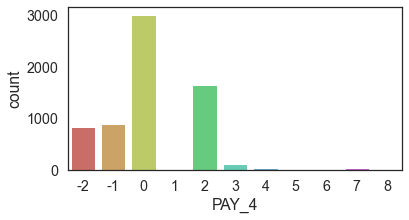

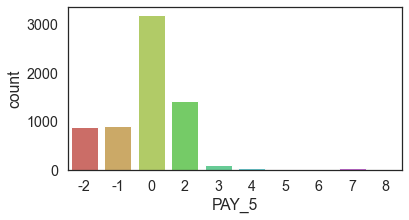

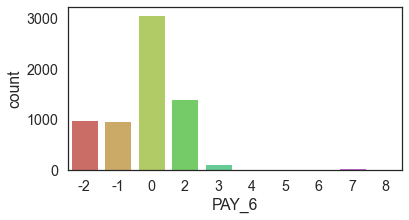

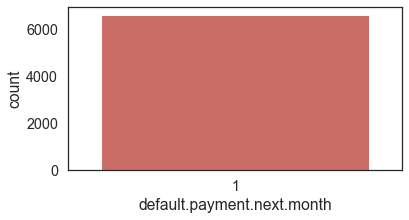

In [103]:

for i in df_categorica.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(df_categorica[i][df_categorica[var_target] == 1], data = df_categorica,
    palette='hls')
    plt.xticks()
    plt.show()


### Distribuição de bons e mau pagadores

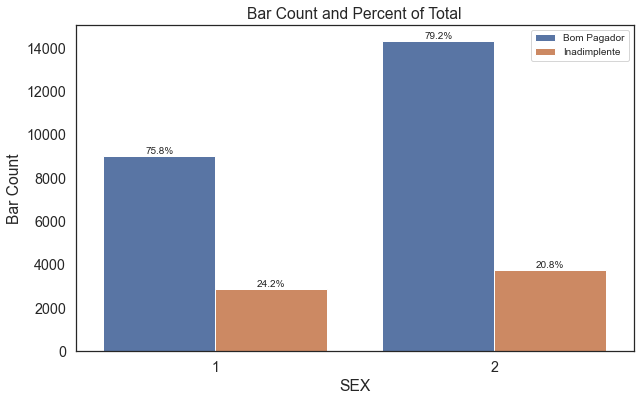

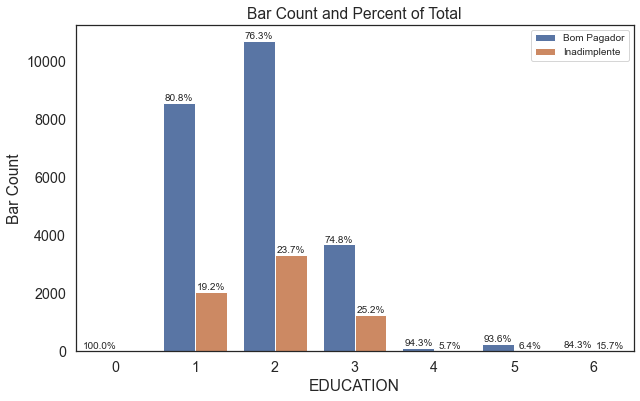

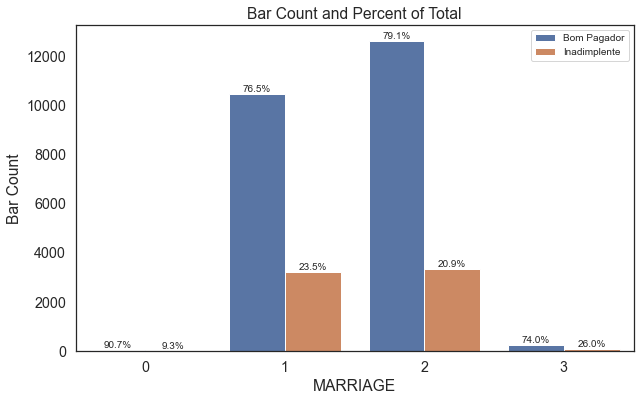

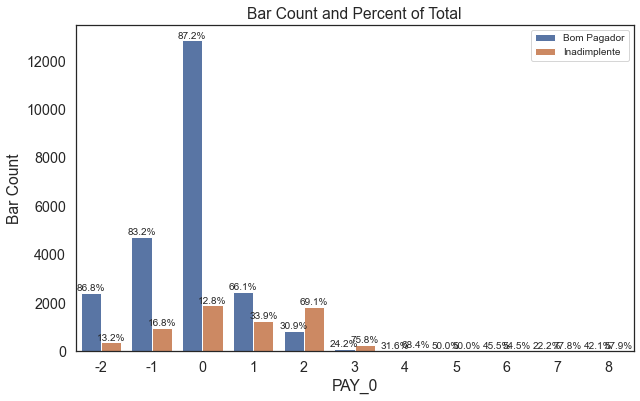

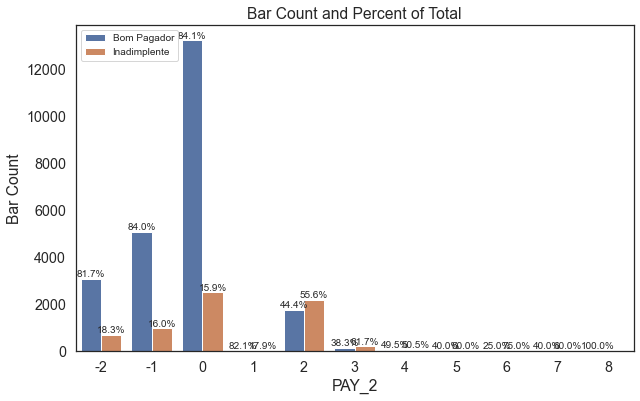

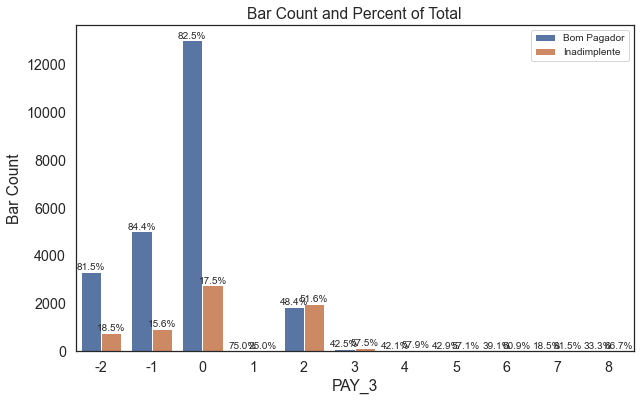

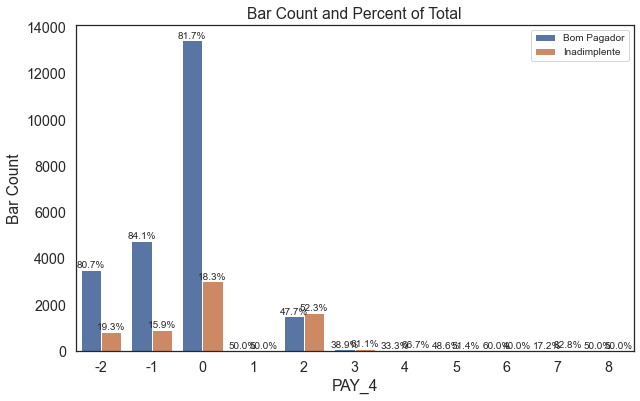

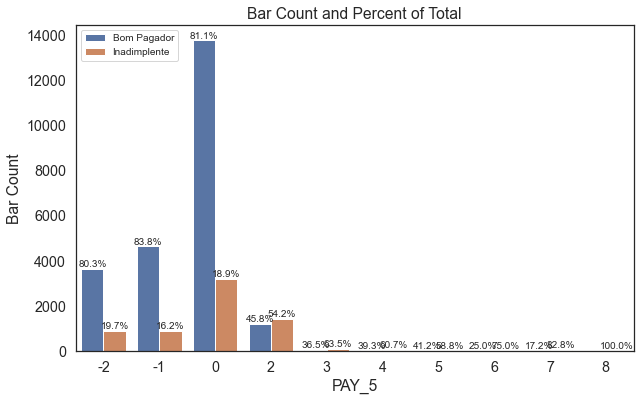

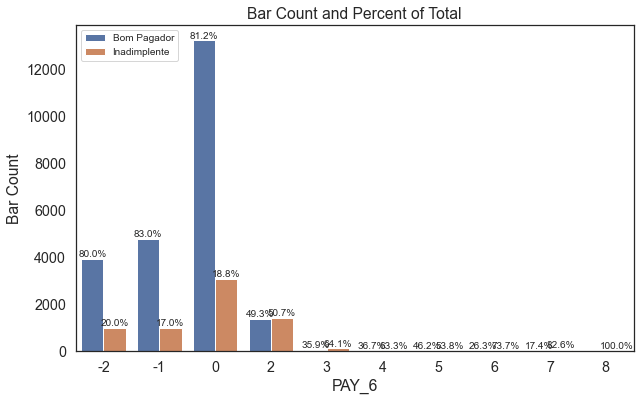

In [136]:
for variavel in df_categorica.columns:

    if variavel != var_target:

        # plot
        variavel_plot = variavel
        variavel_target = 'default.payment.next.month'
        plt.figure(figsize=(10,6))

        ax = sns.countplot(x=variavel_plot, hue=variavel_target, data=df)
        ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

        # add annotations
        for k, c in enumerate(ax.containers):


            # custom label calculates percent and add an empty string so 0 value bars don't have a number
            #labels = [f'{h/df.Exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
            lista_target_unico = sorted(df[variavel_target].unique(), reverse=False)
            lista_x_unico = sorted(df[variavel_plot].unique(), reverse=False)

            target = lista_target_unico[k]

            labels = []

            df_target_filtrado = df[(df[variavel_target]==target)]

            for p, i in enumerate(lista_x_unico):

                especifico = lista_x_unico[p]

                ocorrencias_total = df[(df[variavel_plot])==i][variavel_target].value_counts().sum()
                Exited_especifico = df_target_filtrado[(df_target_filtrado[variavel_plot])==i][variavel_target].value_counts().sum()
                labels.append(f'{Exited_especifico/ocorrencias_total*100:0.1f}%')


            ax.bar_label(c, labels=labels, label_type='edge', fontsize = 10)

        plt.legend(['Bom Pagador', 'Inadimplente'], fontsize = 10)
        plt.show()

Insights em valores absolutos e relativos:

- Gênero:
    - Há maior número de ocorrências de inadimplência entre pessoas do sexo feminino
    - No entanto, a taxa de indadimplência é maior entre pessoas do sexo masculino

- Educação:
    - Há maior número de ocorrências de inadimplência entre pessoas com ensino superior completo, seguida por pós-graduação e ensino médio.
    - No entanto, a taxa de inadimplência é maior entre pessoas com até o ensino médio completo, seguida por ensino superior e pós-graduação.

- Estado civil:
    - Há maior taxa de inadimplência em pessoas com estado civil "Outros" seguida por pessoas casadas e solteiras embora em valores absolutos o número de pessoas que responderam "Outros" seja relativamente baixo.


- Pagamentos em atraso - PAY_0 á PAY_6:
    - Em numeros absolutos há maior ocorrências de inadimplência entre pessoas que pagaram a fatura no dia, mas que não correspondia ao total da fatura
    - No entanto, a taxa de inadimplência passa de cerca de 19% quando há um atraso no primeiro mês para taxas superiores á 52% quando há atraso de 2 meses.

## 3.4 Analise Bi-variada e Multi-variada

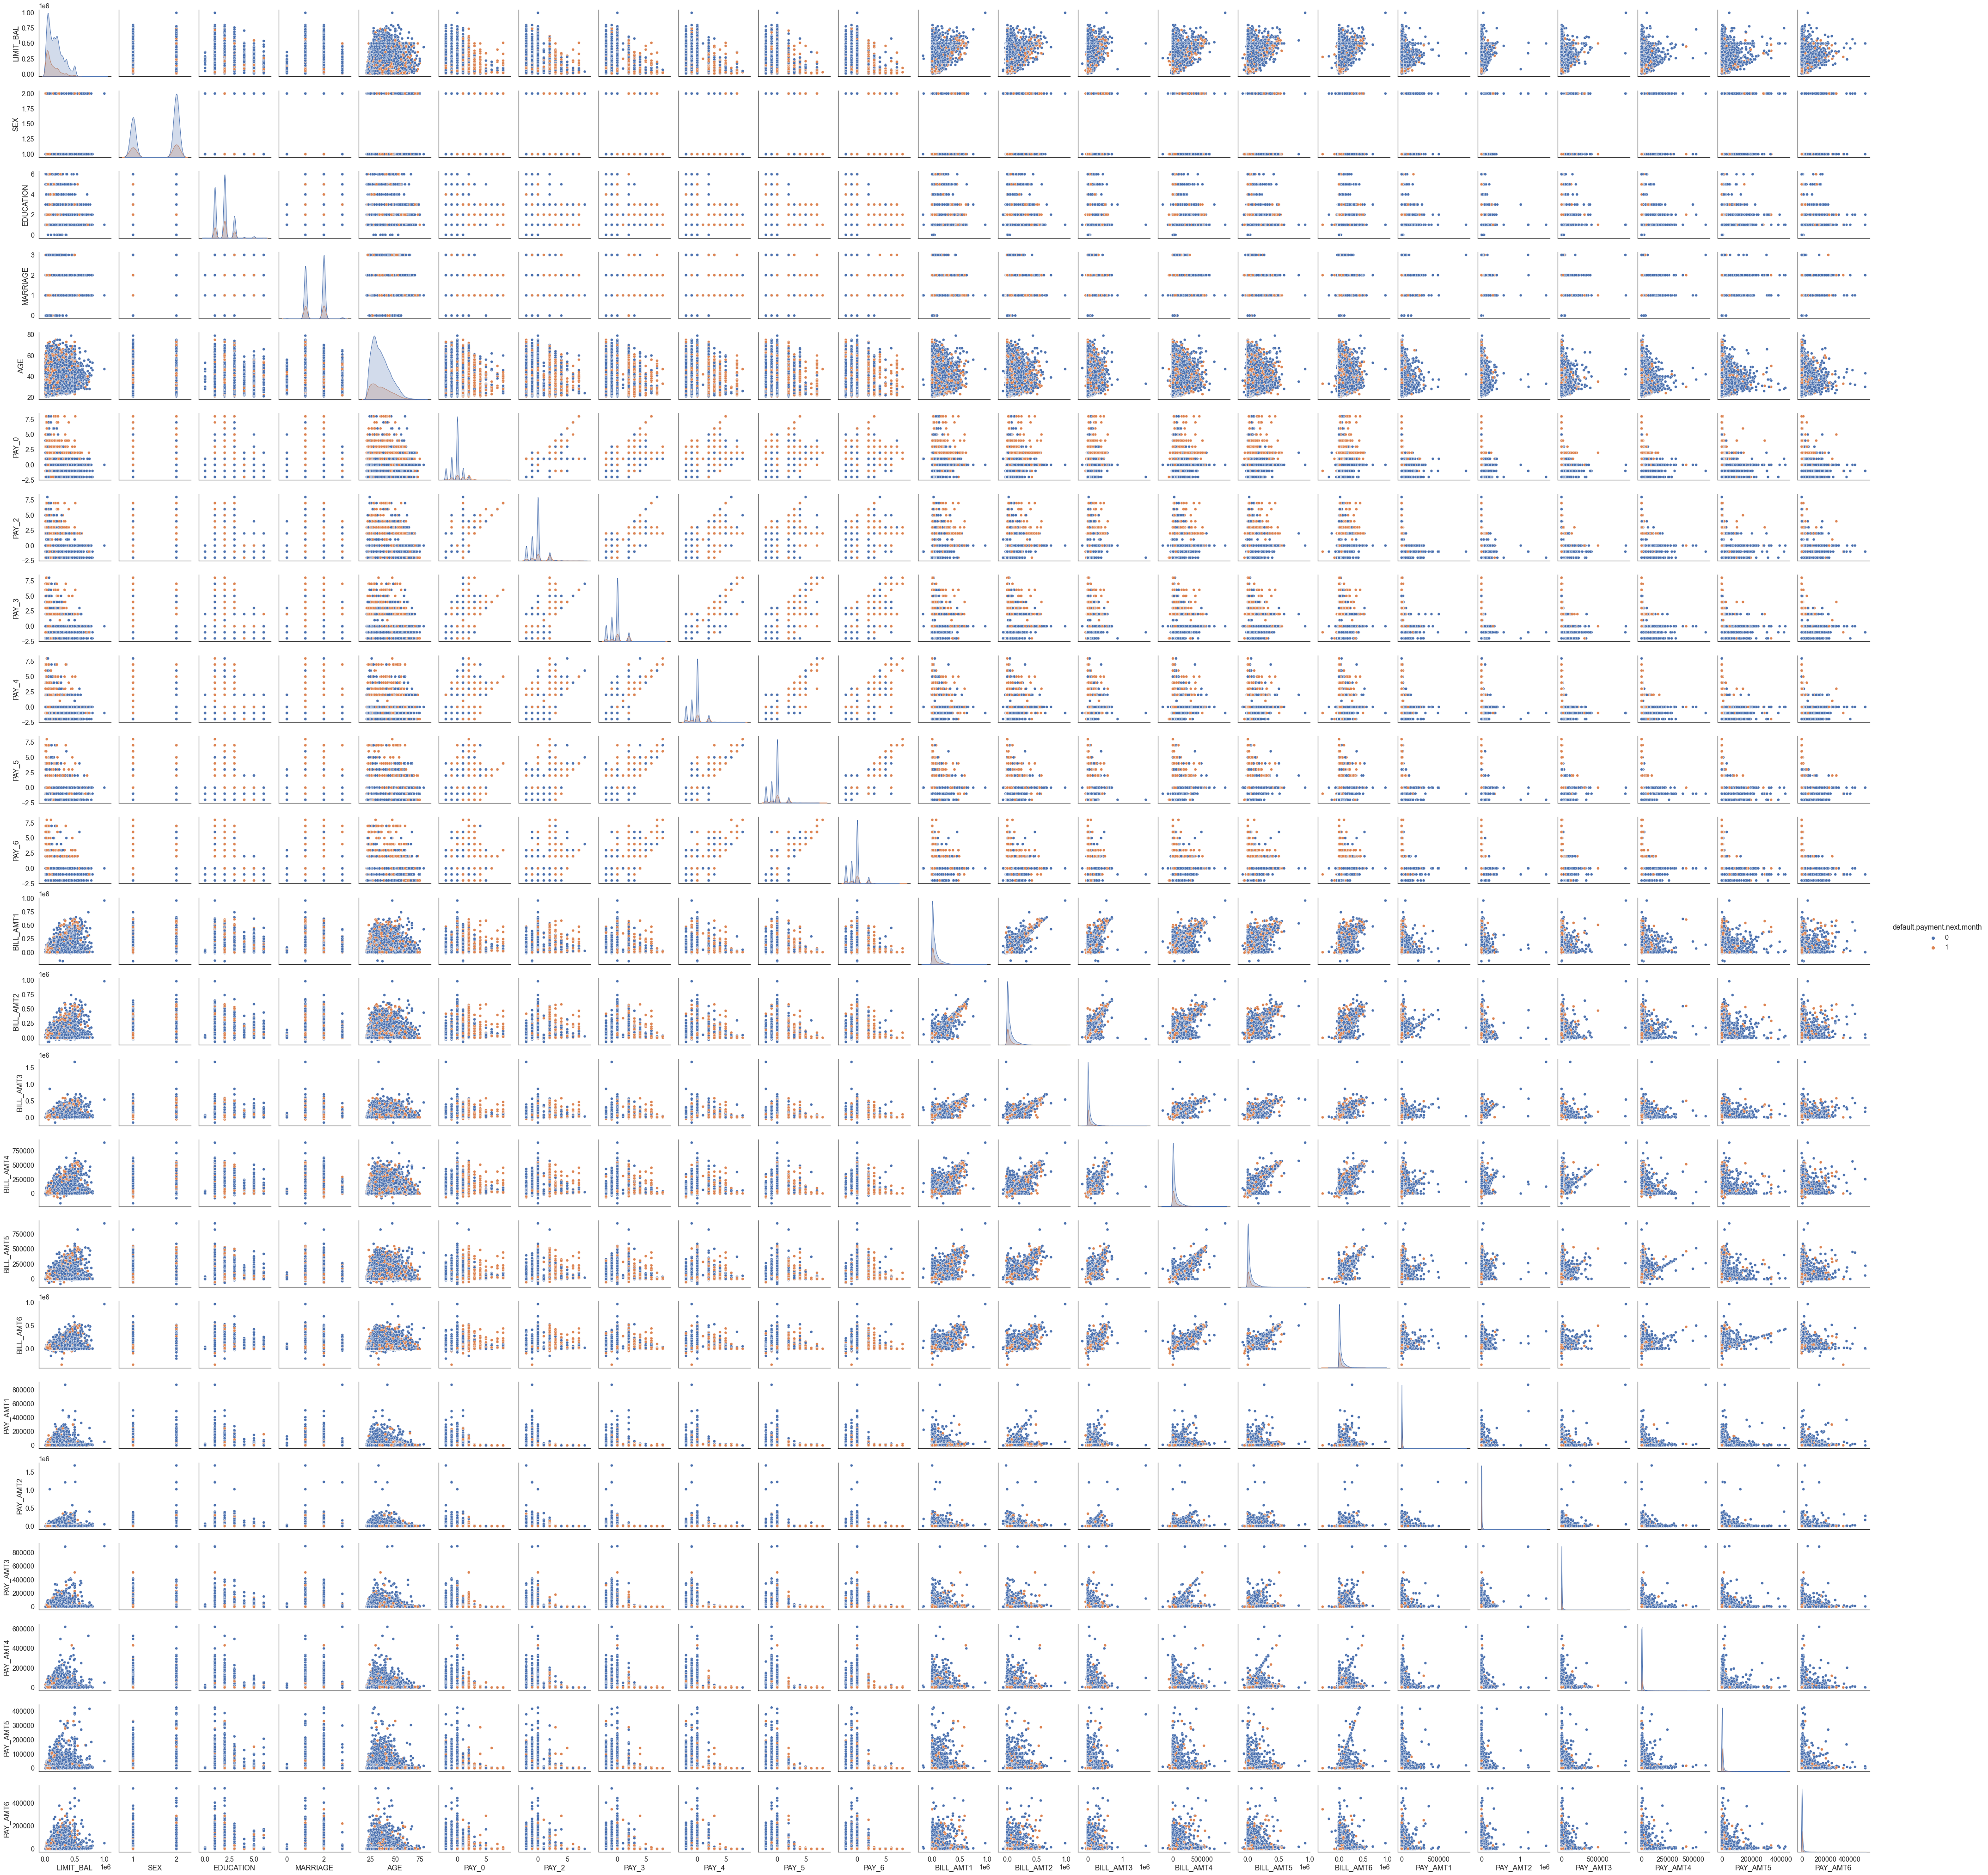

In [141]:
sns.pairplot(df, hue = var_target)
plt.show()

## 3.5 Investigação detalhada da análise Bivariada / MultiVariada

Para investigar:

- Em valores relativos: Sabendo-se que a taxa de inadimplentes aumenta considerávelmente após o atraso no segundo mês
     - 1) Dado que o cliente atrasou por 2 meses, qual a proporção de clientes inadimplente?
     - 2) Dado que o cliente é inadimplente, qual a proporção de clientes que atrasaram por 2 meses?
     - 3) Dado que o cliente atrasou por 2 meses há alguma tendência no valor da fatura do cartão de um mes anterior em comparação aos clientes que não atrasaram? Qual o valor médio da fatura pago por eles?

- Em valores absolutos: Sabendo-se que há maior ocorrência de inadimplência em clientes que pagam as faturas em dia mas que não corresponde ao total da fatura.
    - 4) Dado que o cliente não pagou o montante total da fatura, qual a proporção de clientes inadimplentes?
    - 5) Dado que o cliente é inadimplente, qual a proporção de clientes que pagaram parcialmente as suas faturas?
    - 6 Dado que o cliente não pagou o montante total da fatura há alguma tendência no valor da fatura do cartão de um mes anterior em comparação aos clientes que pagaram o total? Qual o valor médio da fatura pago por eles?

- Correlação variáveis:
    - 7) Há alguma correlação de clientes que atrasaram faturas por 2 meses com outras variáveis como gênero, educação ou estado civil, idade ou limite de crédito?
    - 8) Há alguma correlação de clientes que pagam as faturas em dia mas não o montante total com outras variáveis como gênero, educação ou estado civil, idade ou limite de crédito?

### Identificando clientes que atrasaram por 2 meses:

In [332]:
df_aux = df.copy()

In [333]:
## Identificando clientes com atraso de 2 meses no histórico de 6 meses anteriores
def func_atraso_2meses(row):
    if row['PAY_0'] == 2 or row['PAY_2'] == 2 or row['PAY_3'] == 2 or row['PAY_4'] == 2 or row['PAY_5'] == 2 or row['PAY_6'] == 2:
        global v
        v = 1
    else:
        v_old = v
        v = 0
    return v

df_aux['atraso_2m_historico_6m'] = df_aux.apply(func_atraso_2meses,axis=1)
df_aux.head(5)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -2  ...        0.0        0.0       0.0     689.0       0.0       0.0   
1      0  ...     3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2      0  ...    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3      0  ...    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4      0  ...    19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  atraso_2m_historico_6m  
0       0.0       0.0                           1                       1  
1       0.0    2000.0                           1                       1  
2    1000.0    5000.0                           0                       0  
3    1069.0    1000.0                           0                       0  
4     689.0     679.0                           0                       0  

[5 rows x 25 columns]

### Identificando clientes que não pagam o montante total da fatura

In [334]:
### Identificando clientes que não pagam o montante total da fatura
def func_pagantes_parciais(row):
    if row['PAY_0'] == 0 or row['PAY_2'] == 0 or row['PAY_3'] == 0 or row['PAY_4'] == 0 or row['PAY_5'] == 0 or row['PAY_6'] == 0:
        global v
        v = 1
    else:
        v_old = v
        v = 0
    return v

df_aux['pago_parcial'] = df_aux.apply(func_pagantes_parciais,axis=1)
df_aux.head(5)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0     -2  ...        0.0       0.0     689.0       0.0       0.0       0.0   
1      0  ...     3261.0       0.0    1000.0    1000.0    1000.0       0.0   
2      0  ...    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0   
3      0  ...    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0   
4      0  ...    19131.0    2000.0   36681.0   10000.0    9000.0     689.0   

   PAY_AMT6  default.payment.next.month  atraso_2m_historico_6m  pago_parcial  
0       0.0                           1                       1             0  
1    2000.0                           1                       1             1  
2    5000.0                           0                       0             1  
3    1000.0                           0                       0             1  
4     679.0                           0                       0             1  

[5 rows x 26 columns]

### 1) Dado que o cliente atrasou por 2 meses, qual a proporção de clientes inadimplente?

In [335]:
df_aux[ (df_aux['atraso_2m_historico_6m']==1) ].describe()[['BILL_AMT1','default.payment.next.month']]

BILL_AMT1  default.payment.next.month
count    8320.000000                 8320.000000
mean    49963.144591                    0.462981
std     66180.703752                    0.498658
min   -165580.000000                    0.000000
25%      9206.500000                    0.000000
50%     26605.500000                    0.000000
75%     63750.500000                    1.000000
max    613860.000000                    1.000000

- 46,29% dos clientes que atrasaram por 2 meses são inadimplentes

### 2) Dado que o cliente é inadimplente, qual a proporção de clientes que atrasaram por 2 meses?

In [336]:
df_aux[ (df_aux['default.payment.next.month']==1) ].describe()[['BILL_AMT1','atraso_2m_historico_6m']]

BILL_AMT1  atraso_2m_historico_6m
count    6636.000000             6636.000000
mean    48509.162297                0.580470
std     73782.067220                0.493519
min     -6676.000000                0.000000
25%      2987.750000                0.000000
50%     20185.000000                1.000000
75%     59626.500000                1.000000
max    613860.000000                1.000000

- 58,04% dos clientes inadimplentes atrasaram a fatura por 2 meses

### 3) Dado que o cliente atrasou por 2 meses há alguma tendência no valor da fatura do cartão de um mes anterior em comparação aos clientes que não atrasaram? Qual o valor médio da fatura pago por eles?

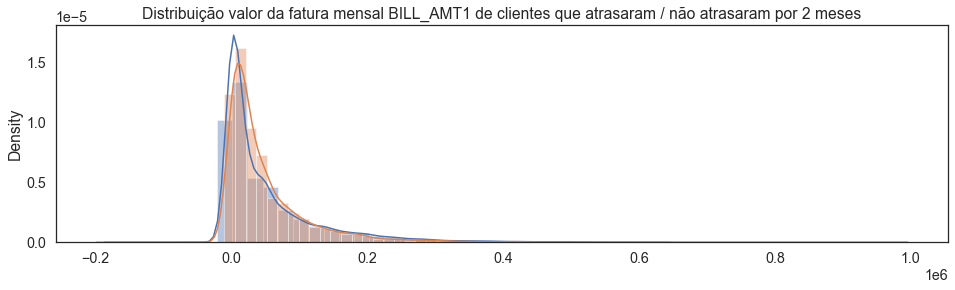

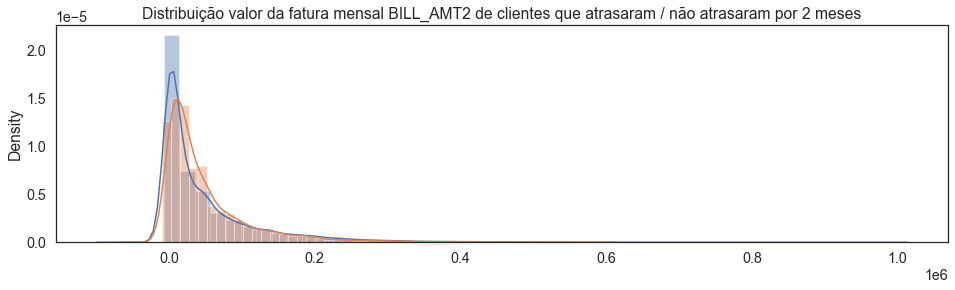

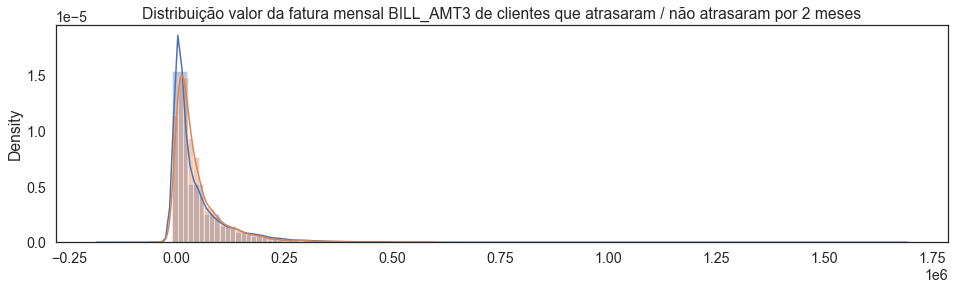

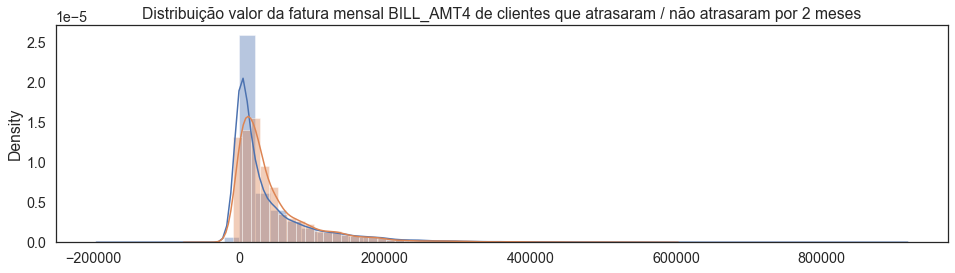

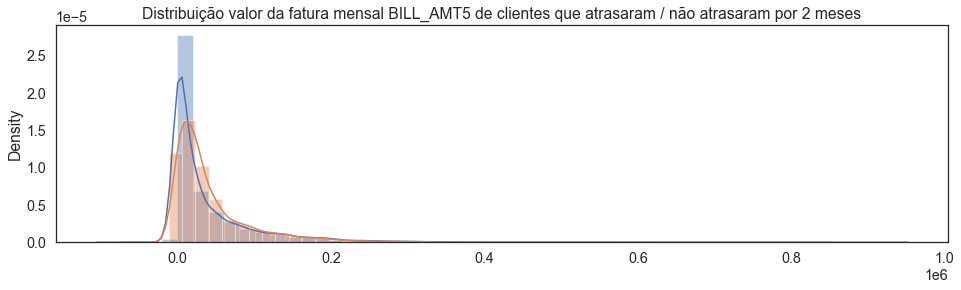

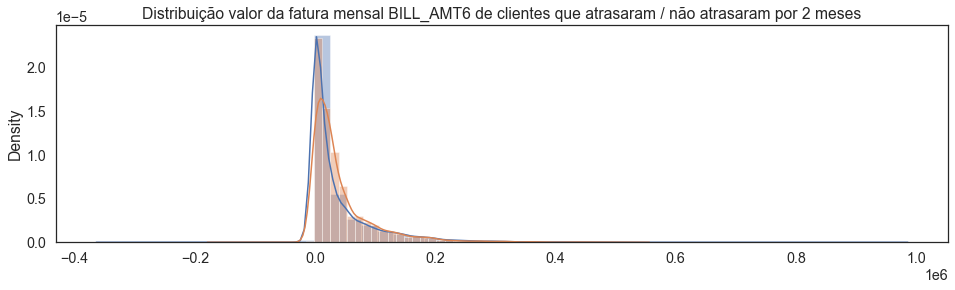

In [344]:
for bill in ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:

    fig, (ax) = plt.subplots(ncols=1, figsize=(16,4))

    #sns.distplot(df_aux['BILL_AMT1'][ (df_aux['atraso_2m_historico_6m']==0) & (df_aux[var_target]==1) ], bins=50)
    #sns.distplot(df_aux['BILL_AMT1'][ (df_aux['atraso_2m_historico_6m']==1) & (df_aux[var_target]==1) ], bins=50)

    sns.distplot(df_aux[bill][ (df_aux['atraso_2m_historico_6m']==0)], bins=50)
    sns.distplot(df_aux[bill][ (df_aux['atraso_2m_historico_6m']==1)], bins=50)

    ax.set_xlabel('')
    ax.set_title('Distribuição valor da fatura mensal {} de clientes que atrasaram / não atrasaram por 2 meses'.format(bill))
    plt.show()

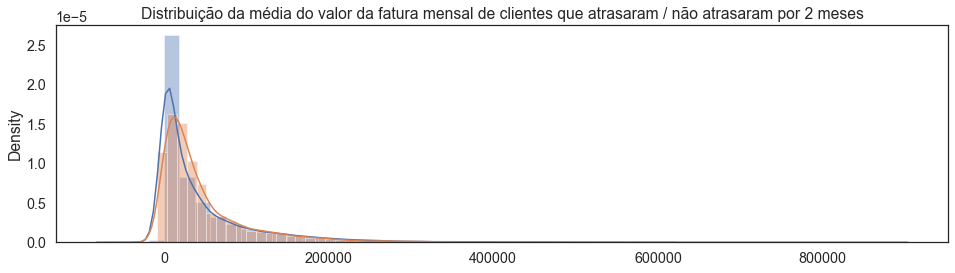

In [346]:
#Calculo media da fatura:   
df_aux['BILL_MEDIO'] = ( df_aux['BILL_AMT1'] + df_aux['BILL_AMT2'] + df_aux['BILL_AMT3'] + df_aux['BILL_AMT4'] + df_aux['BILL_AMT5'] + df_aux['BILL_AMT6'] ) / 6


fig, (ax) = plt.subplots(ncols=1, figsize=(16,4))

#sns.distplot(df_aux['BILL_AMT1'][ (df_aux['atraso_2m_historico_6m']==0) & (df_aux[var_target]==1) ], bins=50)
#sns.distplot(df_aux['BILL_AMT1'][ (df_aux['atraso_2m_historico_6m']==1) & (df_aux[var_target]==1) ], bins=50)

sns.distplot(df_aux['BILL_MEDIO'][ (df_aux['atraso_2m_historico_6m']==0)], bins=50)
sns.distplot(df_aux['BILL_MEDIO'][ (df_aux['atraso_2m_historico_6m']==1)], bins=50)

ax.set_xlabel('')
ax.set_title('Distribuição da média do valor da fatura mensal de clientes que atrasaram / não atrasaram por 2 meses')
plt.show()

In [347]:
v_sem_atraso = df_aux[ (df_aux['atraso_2m_historico_6m']==0) ].BILL_MEDIO.mean()
v_com_atraso = df_aux[ (df_aux['atraso_2m_historico_6m']==1) ].BILL_MEDIO.mean()

print("Valor médio da fatura de clientes que atrasaram o pagamento em 2 meses = {}".format(int(v_com_atraso)))
print("Valor médio da fatura de clientes que não atrasaram por 2 meses = {}".format(int(v_sem_atraso)))

Valor médio da fatura de clientes que atrasaram o pagamento em 2 meses = 46815
Valor médio da fatura de clientes que não atrasaram por 2 meses = 44271


- Cientes que atrasaram o pagamento em 2 meses possuiam um valor médio de fatura 6% superior aos que não atrasaram.

### 4) Dado que o cliente não pagou o montante total da fatura, qual a proporção de clientes inadimplentes?

In [348]:
df_aux[ (df_aux['pago_parcial']==1) ].describe()[['default.payment.next.month']]

default.payment.next.month
count                21173.000000
mean                     0.200586
std                      0.400448
min                      0.000000
25%                      0.000000
50%                      0.000000
75%                      0.000000
max                      1.000000

- 20% dos clientes que pagaram o valor parcial das faturas são inadimplentes, muito semelhante a baseline 22,12% de inadimplencia.

### 5) Dado que o cliente é inadimplente, qual a proporção de clientes que pagaram parcialmente as suas faturas?

In [349]:
df_aux[ (df_aux['default.payment.next.month']==1) ].describe()[['pago_parcial']]

pago_parcial
count   6636.000000
mean       0.639994
std        0.480038
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

- 64% dos clientes que são inadimplentes pagaram o valor parcial das faturas

### 6) Dado que o cliente não pagou o montante total da fatura há alguma tendência no valor da fatura do cartão de um mes anterior em comparação aos clientes pagaram o total? Qual o valor médio da fatura pago por eles?

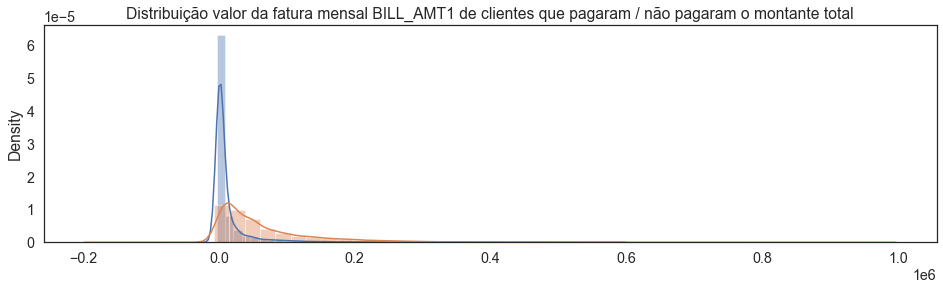

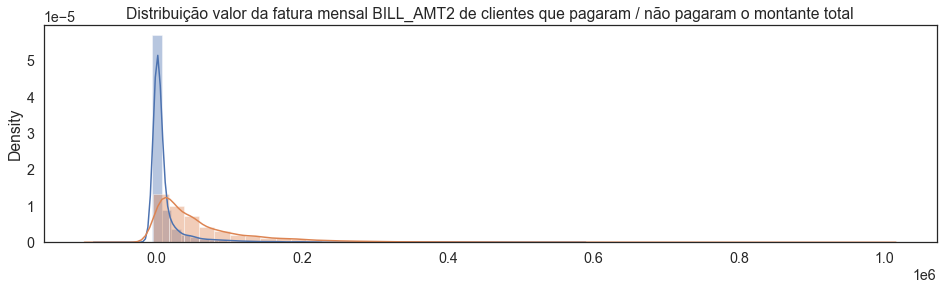

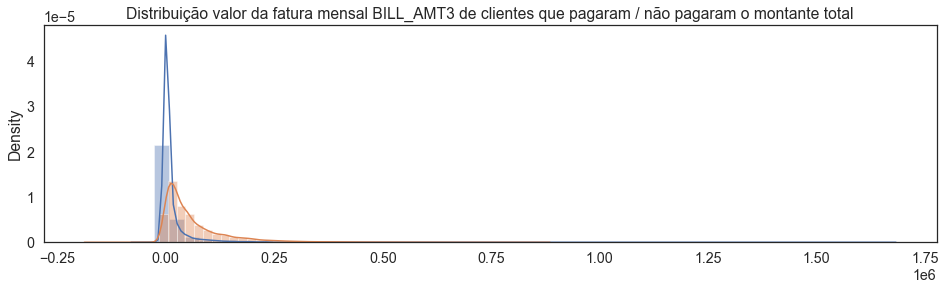

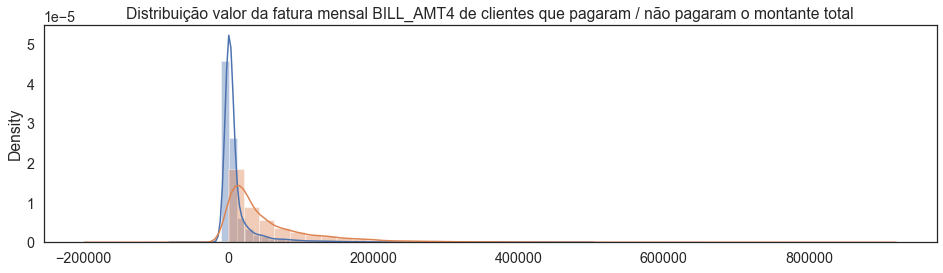

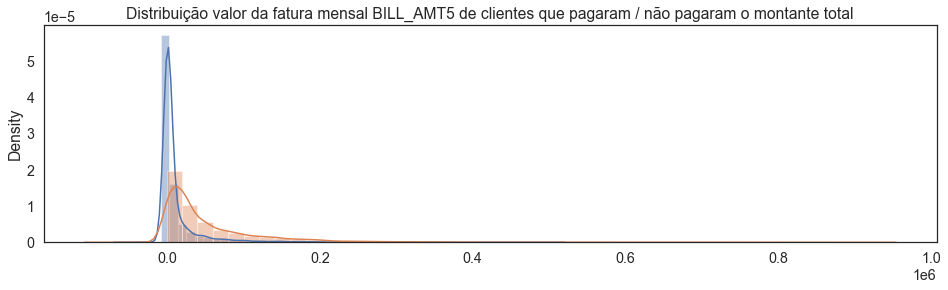

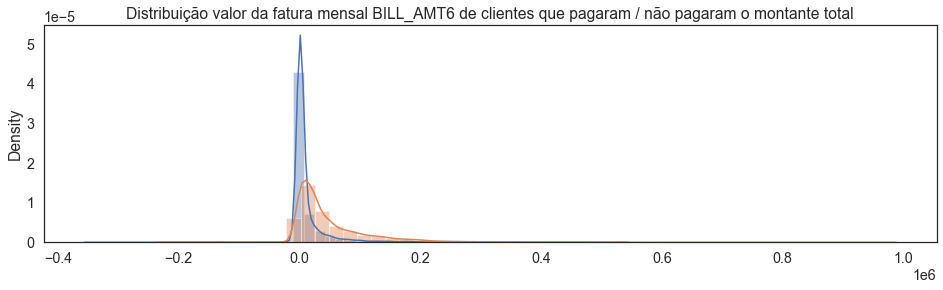

In [352]:
for bill in ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:

    fig, (ax) = plt.subplots(ncols=1, figsize=(16,4))

    sns.distplot(df_aux[bill][ (df_aux['pago_parcial']==0)], bins=50)
    sns.distplot(df_aux[bill][ (df_aux['pago_parcial']==1)], bins=50)

    ax.set_xlabel('')
    ax.set_title('Distribuição valor da fatura mensal {} de clientes que pagaram / não pagaram o montante total'.format(bill))
    plt.show()

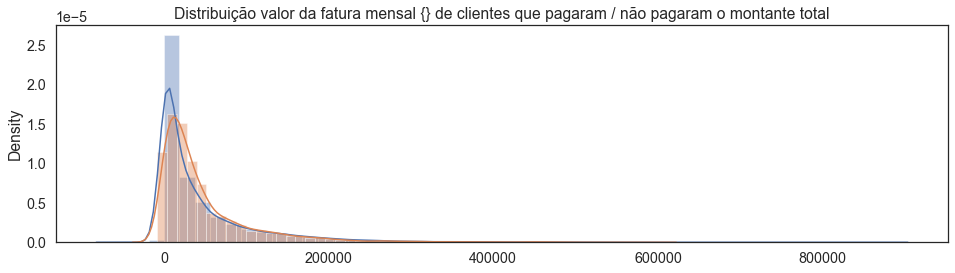

In [353]:
fig, (ax) = plt.subplots(ncols=1, figsize=(16,4))

#sns.distplot(df_aux['BILL_AMT1'][ (df_aux['atraso_2m_historico_6m']==0) & (df_aux[var_target]==1) ], bins=50)
#sns.distplot(df_aux['BILL_AMT1'][ (df_aux['atraso_2m_historico_6m']==1) & (df_aux[var_target]==1) ], bins=50)

sns.distplot(df_aux['BILL_MEDIO'][ (df_aux['atraso_2m_historico_6m']==0)], bins=50)
sns.distplot(df_aux['BILL_MEDIO'][ (df_aux['atraso_2m_historico_6m']==1)], bins=50)

ax.set_xlabel('')
ax.set_title('Distribuição valor da fatura mensal {} de clientes que pagaram / não pagaram o montante total')
plt.show()

In [356]:
v_sem_atraso = df_aux[ (df_aux['pago_parcial']==0) ].BILL_MEDIO.mean()
v_com_atraso = df_aux[ (df_aux['pago_parcial']==1) ].BILL_MEDIO.mean()

print("Valor médio da fatura de clientes que não pagaram o montante total da fatura = {}".format(int(v_com_atraso)))
print("Valor médio da fatura de clientes que pagaram o montante total = {}".format(int(v_sem_atraso)))

Valor médio da fatura de clientes que não pagaram o montante total da fatura = 58389
Valor médio da fatura de clientes que pagaram o montante total = 12803


- Cientes que pagaram parcialmnete a fatura possuiam um valor médio de fatura 4.5 vezes superior aos que pagaram o montante total

## 3.5 Correlação de variáveis

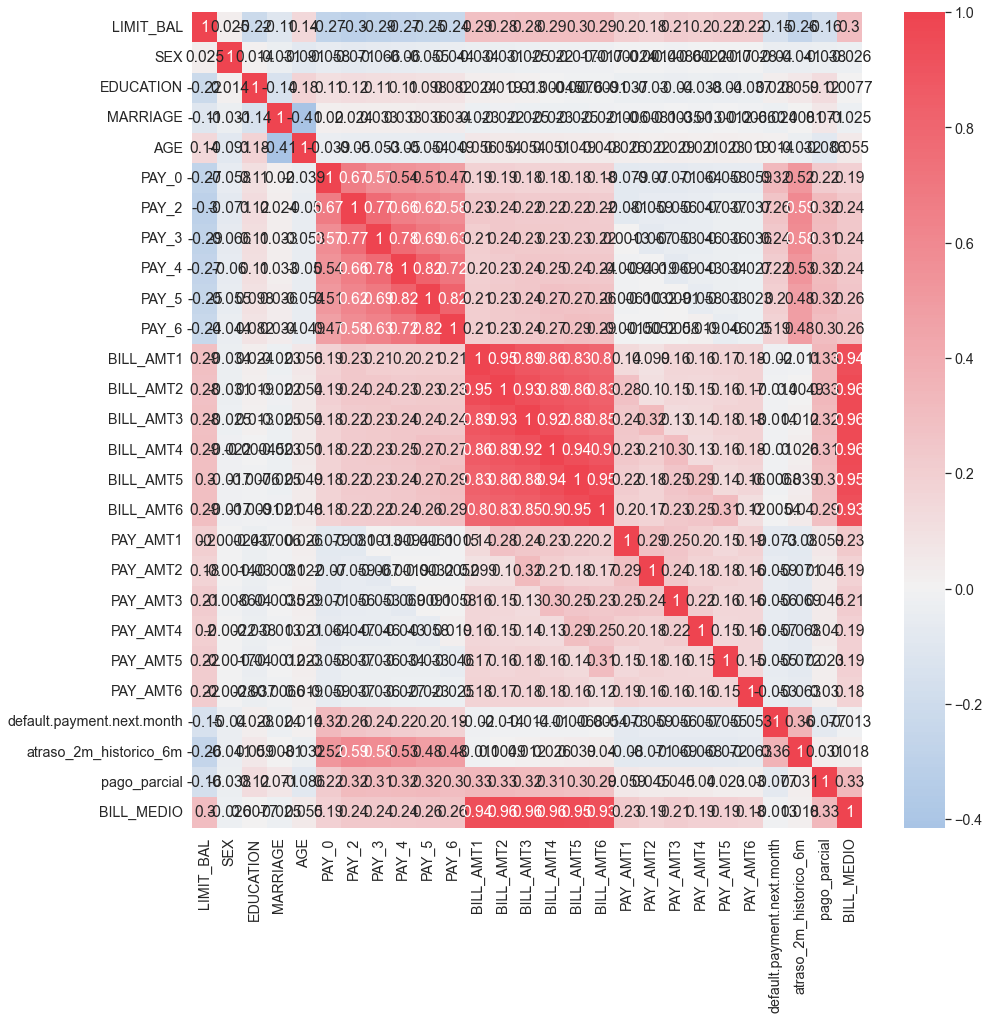

In [362]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(df_aux.corr(),annot=True, cmap=cmap, center=0)
plt.show()

In [376]:
df_aux.corr()[['default.payment.next.month','atraso_2m_historico_6m','pago_parcial','BILL_MEDIO','SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']].iloc[23:]

default.payment.next.month  \
default.payment.next.month                    1.000000   
atraso_2m_historico_6m                        0.360868   
pago_parcial                                 -0.076922   
BILL_MEDIO                                   -0.012691   

                            atraso_2m_historico_6m  pago_parcial  BILL_MEDIO  \
default.payment.next.month                0.360868     -0.076922   -0.012691   
atraso_2m_historico_6m                    1.000000      0.030721    0.018002   
pago_parcial                              0.030721      1.000000    0.328385   
BILL_MEDIO                                0.018002      0.328385    1.000000   

                                 SEX  EDUCATION  MARRIAGE       AGE  LIMIT_BAL  
default.payment.next.month -0.039961   0.028006 -0.024339  0.013890  -0.153520  
atraso_2m_historico_6m     -0.041111   0.059346  0.008055 -0.031522  -0.258758  
pago_parcial               -0.037514   0.118247  0.071237 -0.085517  -0.161177  
BILL_MEDIO                 -0.025920   0.007750 -0.024507  0.054981   0.302044

- Atraso de 2 meses no historico do cliente tem correlação forte com a variável target
- As variáveis PAY_X tem correlação forte com a variável target e alta correlação entre si.
- Clientes que pagam parcialmente as faturas tem correlação forte com o valor médio da fatura
- Clientes com alto valor médio de faturas tem correlação forte com o limite de crédito.

# 4 Feature Engineering

In [452]:
df_aux2 = df_aux.copy()

## 4.1 Valor total de pagamento e fatura no historico de 6 meses

In [453]:
df_aux2['BILL_TOTAL'] = df_aux2['BILL_AMT1'] + df_aux2['BILL_AMT2'] + df_aux2['BILL_AMT3'] + df_aux2['BILL_AMT4'] + df_aux2['BILL_AMT5'] + df_aux2['BILL_AMT6'] 
df_aux2['PAY_AMT_TOTAL'] = df_aux2['PAY_AMT1'] + df_aux2['PAY_AMT2'] + df_aux2['PAY_AMT3'] + df_aux2['PAY_AMT4'] + df_aux2['PAY_AMT5'] + df_aux2['PAY_AMT6']

## 4.2 Percentual de crédito comprometido pelo valor total do pagamento

In [454]:
lista_pagamento = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

for indice, mes_pagamento in enumerate(lista_pagamento):
    
    perc_comprometido_pagamento = 'perc_comprometido_pagamento ' + str(indice+1)    
    df_aux2[perc_comprometido_pagamento] = df_aux2[mes_pagamento]/df_aux2['LIMIT_BAL']

## 4.3 Percentual de crédito comprometido pelo valor total da fatura

In [455]:
lista_bills = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

for indice, bill in enumerate(lista_bills):
    
    perc_comprometido_fatura = 'perc_comprometido_fatura ' + str(indice+1)    
    df_aux2[perc_comprometido_fatura] = df_aux2[bill]/df_aux2['LIMIT_BAL']

## 4.4 Total saldo devedor: somatório do (valor da fatura - valor pago)

In [456]:
df_aux2['saldo_devedor'] = (df_aux2['BILL_AMT2'] - df_aux2['PAY_AMT1']) + (df_aux2['BILL_AMT3'] - df_aux2['PAY_AMT2']) + (df_aux2['BILL_AMT4'] - df_aux2['PAY_AMT3']) + (df_aux2['BILL_AMT5'] - df_aux2['PAY_AMT4']) + (df_aux2['BILL_AMT6'] - df_aux2['PAY_AMT5'])

## 4.5 Proporção saldo devedor / limite de crédito

In [457]:
df_aux2['saldo_dev_por_limite'] = df_aux2['saldo_devedor']/df_aux2['LIMIT_BAL']

In [458]:
df_aux2[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','saldo_devedor','saldo_dev_por_limite']]

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0         3913.0     3102.0      689.0        0.0        0.0        0.0   
1         2682.0     1725.0     2682.0     3272.0     3455.0     3261.0   
2        29239.0    14027.0    13559.0    14331.0    14948.0    15549.0   
3        46990.0    48233.0    49291.0    28314.0    28959.0    29547.0   
4         8617.0     5670.0    35835.0    20940.0    19146.0    19131.0   
...          ...        ...        ...        ...        ...        ...   
29995   188948.0   192815.0   208365.0    88004.0    31237.0    15980.0   
29996     1683.0     1828.0     3502.0     8979.0     5190.0        0.0   
29997     3565.0     3356.0     2758.0    20878.0    20582.0    19357.0   
29998    -1645.0    78379.0    76304.0    52774.0    11855.0    48944.0   
29999    47929.0    48905.0    49764.0    36535.0    32428.0    15313.0   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0           0.0     689.0       0.0       0.0       0.0       0.0   
1           0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2        1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3        2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4        2000.0   36681.0   10000.0    9000.0     689.0     679.0   
...         ...       ...       ...       ...       ...       ...   
29995    8500.0   20000.0    5003.0    3047.0    5000.0    1000.0   
29996    1837.0    3526.0    8998.0     129.0       0.0       0.0   
29997       0.0       0.0   22000.0    4200.0    2000.0    3100.0   
29998   85900.0    3409.0    1178.0    1926.0   52964.0    1804.0   
29999    2078.0    1800.0    1430.0    1000.0    1000.0    1000.0   

       saldo_devedor  saldo_dev_por_limite  
0             3102.0              0.155100  
1            11395.0              0.094958  
2            66396.0              0.737733  
3           176956.0              3.539120  
4            42352.0              0.847040  
...              ...                   ...  
29995       494851.0              2.249323  
29996         5009.0              0.033393  
29997        38731.0              1.291033  
29998       122879.0              1.535988  
29999       175637.0              3.512740  

[30000 rows x 14 columns]

# 5 Amostragem estratificada: 20% teste e 80% train+valid

In [487]:
from sklearn.model_selection import train_test_split

X = df_aux2.drop(['default.payment.next.month'], axis=1)
y = df_aux2['default.payment.next.month']

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
y_test.value_counts()

0    4673
1    1327
Name: default.payment.next.month, dtype: int64

# 6 Pré-Processamento
- Não há necessidade de aplciar encoders. As variáveis categóricas estão em formato numérico
- Os Scalers serão aplicados em testes com pipelines antes do treinamento de modelos

# 7 Prototipação

- Na prototipação iremos aplicar a técnica de oversampling para alimentar os algorítmos com proporções diferentes de exemplos entre classe 1 / exemplos classe 2 para selecionar os melhores modelos para tunning.
- Iremos aplicar PCA = 10 e 7 para não descartarmos na prototipação modelos que não performam bem com um alto numero de features

## 7.1 Com LazyPredict

- Na prototipação iremos aplicar a técnica de oversampling para alimentar os algorítmos com proporções diferentes de exemplos entre classe 1 / exemplos classe 2 para selecionar os melhores modelos para tunning.
- Iremos aplicar PCA = 10 e 7 para não descartarmos na prototipação modelos que não performam bem com um alto numero de features
- Iremos testar também a aplicação de scalers para não descartarmos nessa etapa modelos que performariam bem quando aplicado.

In [489]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models_test = pd.DataFrame()

fator_balanc = [0.3,0.5,0.8,1]
num_reducoes_pca = [10,7]

#Loop numero de repetições do experimento
for rep in range(1):
    
   ##Loop do dicionário Sentilex Escolhido: 
    for fator in fator_balanc:
        
        print("Iterando fator de balanc = {} - Repetição = {}".format(fator,rep))
        

        #Dados de teste
        X_test2 = X_test
        y_test2 = y_test
        
        ##Balanceando dados treino + valid
        nr = NearMiss(sampling_strategy=fator)
        X_train_valid_balanc, y_train_valid_balanc = nr.fit_resample(X_train_valid, y_train_valid)


        #Dados de treino = treino+valid
        X_train4 = X_train_valid_balanc
        y_train4 = y_train_valid_balanc
            
        

        # Normalizando - FIT APENAS TREINO
        scaler = StandardScaler()
        scaler.fit(X_train4)
        
        
        X_train_norm = scaler.transform(X_train4)        
        X_test_norm = scaler.transform(X_test2)
        
        
        
        ########################### Previsao dados teste ###########################
                #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['Fator_balanc'] = fator
        models['Normalizacao'] = "NAO"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['Fator_balanc'] = fator
        models['Normalizacao'] = "SIM"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        

        ### Loop para aplicação de PCA
        for num_reducoes in num_reducoes_pca:
            
            #Aplicando PCA - FIT APENAS TREINO
            pca = PCA(n_components=num_reducoes)            
            pca.fit(X_train4,y_train4)
            
            X_train_pca = pca.transform(X_train4)
            X_test_pca = pca.transform(X_test2)
            X_valid_pca = pca.transform(X_valid2)

            #Aplicando Normalização - FIT APENAS TREINO
            scaler = StandardScaler()
            scaler.fit(X_train_pca)
            
            X_train_pca_normalized = scaler.transform(X_train_pca)
            
            X_test_pca_normalized = scaler.transform(X_test_pca)
            
            X_valid_pca_normalized = scaler.transform(X_valid_pca)



            ########################### Previsao dados teste ###########################            
            #Testando PCA + normalizado
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_test_pca_normalized, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = num_reducoes
            models['Fator_balanc'] = fator
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_test_pca, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = num_reducoes 
            models['Fator_balanc'] = fator
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

Iterando fator de balanc = 0.3 - Repetição = 0


  0%|                                                                                           | 0/29 [00:02<?, ?it/s]


KeyboardInterrupt: 

## Validação Cruzada

In [496]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

############### Definição dos modelos ingênuos
model1 = RandomForestClassifier(random_state=1, n_jobs=-1)
model2 = LGBMClassifier(random_state=1, n_jobs=-1)
model3 = SVC()
model4 = LogisticRegression()

## Definindo AUC_SCORE
roc_score = make_scorer(roc_auc_score)
        

models = [model1,model2,model3,model4]
nome_modelo = ['RandomForest','LightLGBM','NuSVC','LogistRegression']


# Fator de balanceamento
fator_balanc = [0.3,0.5,0.8,1]

resultados_modelos = []



## Loop fator de balanceamento
for fator in fator_balanc:
    print("Iterando fator balanc = {}".format(fator))


    ##Balanceando dados treino + valid
    nr = NearMiss(sampling_strategy=fator)
    X_train_valid_balanc, y_train_valid_balanc = nr.fit_resample(X_train_valid, y_train_valid)

    
    #Dados de treino = treino+valid
    X_train2 = X_train_valid_balanc
    y_train2 = y_train_valid_balanc
    
    
    #Renomeando dados de testes para ficar com mesmo indice do X_train
    X_test2 = X_test
    y_test2 = y_test
    
        
    #Loop modelos
    for num_modelo, model in enumerate(models):

        nome_modelo_testado = nome_modelo[num_modelo]


        ############### Pipelines com Scalers e PCA
        ## Pipe sem PCA
        pipe1 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, model)])
        pipe2 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, model)])
        pipe3 = Pipeline([(nome_modelo_testado, model)])

        ## Com PCA 7, 10, 15, 20 reducoes
        pipe4 = Pipeline([('PCA', PCA(n_components=7)),('scaler', StandardScaler()), (nome_modelo_testado, model)])
        pipe5 = Pipeline([('PCA', PCA(n_components=7)),('scaler', MinMaxScaler()), (nome_modelo_testado, model)])
        pipe6 = Pipeline([('PCA', PCA(n_components=7)),(nome_modelo_testado, model)])

        ## Com seletor aleatorio + PCA de 20 e 
        pipe7 = Pipeline([('PCA', PCA(n_components=10)),('scaler', StandardScaler()), (nome_modelo_testado, model)])
        pipe8 = Pipeline([('PCA', PCA(n_components=10)),('scaler', MinMaxScaler()), (nome_modelo_testado, model)])
        pipe9 = Pipeline([('PCA', PCA(n_components=10)),(nome_modelo_testado, model)])

        pipe10 = Pipeline([('PCA', PCA(n_components=15)),('scaler', StandardScaler()), (nome_modelo_testado, model)])
        pipe11 = Pipeline([('PCA', PCA(n_components=15)),('scaler', MinMaxScaler()), (nome_modelo_testado, model)])
        pipe12 = Pipeline([('PCA', PCA(n_components=15)),(nome_modelo_testado, model)])

        pipe13 = Pipeline([('PCA', PCA(n_components=20)),('scaler', StandardScaler()), (nome_modelo_testado, model)])
        pipe14 = Pipeline([('PCA', PCA(n_components=20)),('scaler', MinMaxScaler()), (nome_modelo_testado, model)])
        pipe15 = Pipeline([('PCA', PCA(n_components=20)),(nome_modelo_testado, model)])

        pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8,pipe9,pipe10,pipe11,pipe12,pipe13,pipe14,pipe15,pipe16,pipe17,pipe18]


        #Loop das pipelines testadas 
        for num_pipe, pipe in enumerate(pipelines):

        
            ### Validação cruzada - Metricas Treino
            cv_score = cross_val_score(pipe1, X_train2,y_train2, cv=10, scoring =roc_score )
            auc_treino = cv_score
         
            ### Pipelines - Metricas de teste
            
            #fit pipe
            pipe.fit(X_train2,y_train2)

            # Fazendo predição
            p = pipe.predict(X_test2)

            auc_test = roc_auc_score(y_test2, p)
            
            


            ## Armazenando os resultados
            resultados_modelos.append(np.array( [nome_modelo_testado,fator, num_pipe+1, auc, auc_treino]))




Iterando fator balanc = 0.3


KeyboardInterrupt: 

In [494]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, KFold
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss 


from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC


import random


## Definição score
roc_score = make_scorer(roc_auc_score)

#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_modelos = []

# Fator de balanceamento
fator_balanc = [0.3,0.5,0.8,1]

#Numero de holdouts para repeticao do mesmo experimento
num_holdouts = 1

# Contagem de experimentos
contagem_experimentos_unicos = 0

#Maximo auc nos experimentos
maximo_auc = 0


#Loop de seed aleatória - repeticoes
for seed in range(1):
    
    #print("Iterando seed = {}".format(seed))  
        
    ##Loop balanceamento dos dados 
    for fator in fator_balanc:
        print("Iterando seed = {} - fator balanc = {}".format(seed,fator))

        #Dados de teste
        X_test3 = X_test
        y_test3 = y_test
        
        ##Balanceando dados treino + valid
        nr = NearMiss(sampling_strategy=fator)
        X_train_valid_balanc, y_train_valid_balanc = nr.fit_resample(X_train_valid, y_train_valid)


        #Dados de treino = treino+valid
        X_train3 = X_train_valid_balanc
        y_train3 = y_train_valid_balanc

        
        ################ Definição de modelos candidatos ################
        model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
        model2 = LGBMClassifier(random_state=seed, n_jobs=-1)
        model3 = NuSVC()
        

        models = [model1,model2,model3]
        nome_modelo = ['RandomForest','LightLGBM','NuSVC']


        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]
            
            #Nao faremos o tunning
            modelo_tunado = model



            #Loop Seletor de features:
            for k in range(X_train3.shape[1], X_train3.shape[1]+1, 1):  ## Iterar sobre n total de features e n (n = max)

                #############################  Seletor aleatório features  ############################

                selected = np.random.choice(X_train3.columns, k, replace=False)
                                
                #Ordem alfabetica das features
                selected = sorted(selected)


                #Loop Holdout selecionar aleatoriamente 80% dados de treino para alimentar o modelo e a pipe.
                for qtde_holdout in range(1,num_holdouts+1):

                    seed_holdout = random.randint(0,9999)
                    X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3, test_size=0.2, random_state=seed_holdout, stratify=y_train3)


                    ##Renomeando as variáveis para ficar com mesmo índice do X_train
                    X_train4 = X_train3
                    y_train4 = y_train3

                    X_test4 = X_test3
                    y_test4 = y_test3


                    ## Fit modelo seletor de feature
                    modelo_seletor = RandomForestClassifier(random_state=seed, n_jobs=-1)
                    modelo_seletor.fit(X_train4, y_train4)

                    ################ Definição de Pipelines com modelo tunado ################

                    ##Com Seletor K
                    pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                    pipe2 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                    pipe3 = Pipeline([('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])


                    ## Com seletor aleatorio
                    pipe4 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe5 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe6 = Pipeline([(nome_modelo_testado, modelo_tunado)])

                    ## Com PCA
                    pipe7 = Pipeline([('PCA', PCA(n_components=k)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe8 = Pipeline([('PCA', PCA(n_components=k)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe9 = Pipeline([('PCA', PCA(n_components=k)),(nome_modelo_testado, modelo_tunado)])

                    ## Com seletor aleatorio + PCA de k-1 features á k-3 features
                    pipe10 = Pipeline([('PCA', PCA(n_components=k-1)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe11 = Pipeline([('PCA', PCA(n_components=k-1)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe12 = Pipeline([('PCA', PCA(n_components=k-1)),(nome_modelo_testado, modelo_tunado)])

                    pipe13 = Pipeline([('PCA', PCA(n_components=k-2)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe14 = Pipeline([('PCA', PCA(n_components=k-2)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe15 = Pipeline([('PCA', PCA(n_components=k-2)),(nome_modelo_testado, modelo_tunado)])

                    pipe16 = Pipeline([('PCA', PCA(n_components=k-3)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe17 = Pipeline([('PCA', PCA(n_components=k-3)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe18 = Pipeline([('PCA', PCA(n_components=k-3)),(nome_modelo_testado, modelo_tunado)])



                    pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8,pipe9,pipe10,pipe11,pipe12,pipe13,pipe14,pipe15,pipe16,pipe17,pipe18]


                    #Loop das pipelines testadas com seletor de features e outras etapas:
                    for num_pipe, pipe in enumerate(pipelines):

                        ########### features aleatorias aplicado ao  PIPE4 á PIPE6
                        if num_pipe in [3,4,5]:

                            X_train5 = X_train4[selected]
                            y_train5 = y_train4

                            X_test5 = X_test4[selected]

                            ## Nome das features selecionadas aleatoriamente
                            features_selecionadas = ','.join(list(selected))


                        if num_pipe in [0,1,2]:

                            X_train5 = X_train4
                            y_train5 = y_train4

                            X_test5 = X_test4
                            y_test5 = y_test4

                            ## Nome das features selecionadas pelo SelectFromModel
                            selector = SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)
                            selector.fit(X_train5,y_train5)
                            mask = selector.get_support()
                            features_selecionadas = ','.join(list(X_train5.columns[mask]))


                        if num_pipe in [6,7,8]:

                            X_train5 = X_train4
                            y_train5 = y_train4

                            X_test5 = X_test4
                            y_test5 = y_test4

                            features_selecionadas = ','.join(list(selected))

                        # features aleatorias aplicado ao  PIPE10 á PIPE16    
                        if num_pipe >=9:

                            X_train5 = X_train4[selected]
                            y_train5 = y_train4

                            X_test5 = X_test4[selected]
                            y_test5 = y_test4

                            ## Nome das features selecionadas aleatoriamente
                            features_selecionadas = ','.join(list(selected))
                            


                        ############ Armazenando propriedades das PIPES
                        if num_pipe == 0:
                            seletor_feature = "SelectFromModel"
                            scaler = "StandardScaler"

                        if num_pipe == 1:
                            seletor_feature = "SelectFromModel"
                            scaler = "MinMax"

                        if num_pipe == 2:
                            seletor_feature = 'SelectFromModel'
                            scaler = "Sem Scaler"

                        if num_pipe == 3:
                        #if num_pipe == 0:
                            seletor_feature = "Aleatorio"
                            scaler = "StandardScaler"

                        if num_pipe == 4:
                            seletor_feature = "Aleatorio"
                            scaler = "MinMax"

                        if num_pipe == 5:
                            seletor_feature = "Aleatorio"
                            scaler = "Sem Scaler"

                        if num_pipe == 6:
                            seletor_feature = "PCA k=num_feat"
                            scaler = "StandardScaler"

                        if num_pipe == 7:
                            seletor_feature = "PCA k=num_feat"
                            scaler = "MinMax"

                        if num_pipe == 8:
                            seletor_feature = "PCA k=num_feat"
                            scaler = "Sem Scaler"


                        if num_pipe == 9:
                            seletor_feature = "Aleatório e PCA k-1"
                            scaler = "StandardScaler"

                        if num_pipe == 10:
                            seletor_feature = "Aleatório e PCA k-1"
                            scaler = "MinMax"

                        if num_pipe == 11:
                            seletor_feature = "Aleatório e PCA k-1"
                            scaler = "Sem Scaler"



                        if num_pipe == 12:
                            seletor_feature = "Aleatório e PCA k-2"
                            scaler = "StandardScaler"

                        if num_pipe == 13:
                            seletor_feature = "Aleatório e PCA k-2"
                            scaler = "MinMax"

                        if num_pipe == 14:
                            seletor_feature = "Aleatório e PCA k-2"
                            scaler = "Sem Scaler"


                        if num_pipe == 15:
                            seletor_feature = "Aleatório e PCA k-3"
                            scaler = "StandardScaler"

                        if num_pipe == 16:
                            seletor_feature = "Aleatório e PCA k-3"
                            scaler = "MinMax"

                        if num_pipe == 17:
                            seletor_feature = "Aleatório e PCA k-3"
                            scaler = "Sem Scaler"
                            
                            
                            
                        ########################################### VALIDAÇÃO CRUZADA - Fit  #################
                                                                       
                        cv_score = cross_val_score(model, X_train5,y_train5, cv=10, scoring = roc_score )
                        auc_treino = cv_score.mean()
                               

                        ################ PREDICT - TEST ################
                        
                        #fit pipe
                        pipe.fit(X_train5,y_train5)
                        
                        # Fazendo predição
                        p = pipe.predict(X_test5)
                        
                        
                        ############## Calculando métricas TEST ################
                        
                        contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                        #Calculando o recall
                        recall_0 = recall_score(y_test5, p, pos_label=0)
                        recall_1 = recall_score(y_test5, p, pos_label=1)

                        #Calculando Precision
                        precision_0 = precision_score(y_test5, p, pos_label = 0)
                        precision_1 = precision_score(y_test5, p, pos_label = 1)

                        #Calculando acurácia
                        accuracy = accuracy_score(y_test5, p)

                        #Calculando AUC
                        auc = roc_auc_score(y_test5, p)

                        ##Media AUC treino e AUC teste
                        auc_treino_teste = (auc + auc_treino) / 2


                       ################ Armazenando e imprimindo os resultados  ################



                        col_names_modelos = ['contagem_exp', 'seed', 'modelo','fator_balanceamento','num_pipe', 'qtde_features', 'features','metodo selecao', 'roc_treino', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_treino_teste']                             
                        resultados_modelos.append(np.array( [contagem_experimentos_unicos, seed, nome_modelo_testado,fator, num_pipe+1,k,features_selecionadas,seletor_feature, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_treino, auc_treino_teste ]))



                        if auc > maximo_auc:

                                print("============================================================================================================================")
                                print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC teste = {} - AUC treino = {}".format(nome_modelo_testado, auc, auc_treino))                   
                                print("     Características dados de treino: Fator de balanceamento = {}".format(fator))
                                print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                print("     Features Selecionadas = {}".format(features_selecionadas))
                                print("     DADOS TESTE - Recall 0 = {} - Recall 1 = {} ".format(recall_0,recall_1))
                                print("============================================================================================================================")


                                melhor_modelo = pipe
                                maximo_auc = auc
                                best_seed = seed

                        #break

Iterando seed = 0 - fator balanc = 0.3
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC teste = 0.6595232500966366 - AUC treino = 0.6052921485315035
     Características dados de treino: Fator de balanceamento = 0.3
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características das features selecionadas: num_features = 43 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,atraso_2m_historico_6m,pago_parcial,BILL_MEDIO,BILL_TOTAL,PAY_AMT_TOTAL,valor_faltante,perc_comprometido_pagamento 1,perc_comprometido_pagamento 2,perc_comprometido_pagamento 3,perc_comprometido_pagamento 4,perc_comprometido_pagamento 5,perc_comprometido_pagamento 6,perc_comprometido_fatura 1,perc_comprometido_fatura 2,perc_comprometido_fatura 3,perc_compromet

KeyboardInterrupt: 